**Author**: CodeForAll  
**License**: MIT License

--- 


# Luenberger Observer for Mass-Spring-Damper System

## Introduction

In this experiment, we will design and implement a **Luenberger Observer** to estimate the state (position and velocity) of a **Mass-Spring-Damper** system. The **Luenberger Observer** is a state estimator that uses available measurements (in this case, the position) to estimate the unmeasured state (velocity). This is particularly useful in control systems when all states are needed for feedback, but only some of them are measurable.

### Problem Setup

The **Mass-Spring-Damper** system is modeled as a second-order differential equation and can be represented in a state-space form:

$$
\dot{x} = A x + B u
$$

Where:
- $x = \begin{bmatrix} \text{position} \\ \text{velocity} \end{bmatrix}$ is the state vector.
- $A$ is the system matrix.
- $B$ is the input matrix.
- $u$ is the control input (which will be set to zero for this experiment).

The output equation is:

$$
y = C x
$$

Where:
- $y$ is the measured output (in this case, the position of the mass).
- $C$ is the output matrix.

The **Luenberger Observer** is a state estimator that uses the system dynamics and the measurement to estimate the state vector $\hat{x}$ (estimated position and velocity). The observer dynamics are given by:

$$
\hat{x}' = A \hat{x} + L (y - C \hat{x})
$$

Where:
- $\hat{x}$ is the estimated state vector.
- $L$ is the observer gain matrix.
- $y$ is the measured position.

### System Design

For this system, the **Mass-Spring-Damper** parameters are as follows:

- Mass $m = 1 \, \text{kg}$
- Spring constant $k = 10 \, \text{N/m}$
- Damping coefficient $c = 1 \, \text{Ns/m}$

The state-space representation of the system is:

$$
A = \begin{bmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{c}{m} \end{bmatrix}
$$

$$
B = \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}
$$

$$
C = \begin{bmatrix} 1 & 0 \end{bmatrix}
$$

In this experiment, the **Luenberger Observer** is designed to estimate both the position and velocity of the system using the measured position. The observer gain matrix $L$ is computed by selecting the desired pole locations for the observer. The poles of the observer determine how quickly the observer converges to the true state.

### Observer Design

To design the observer, we use the **pole placement method**. The observer poles are chosen to be at specific values, which influence how quickly the observer estimates the state. For example, if the poles are placed at $-10$ and $-12$, the observer will have faster dynamics and will track the true state more quickly.

The observer gain matrix $L$ is then computed by placing the poles of the observer at the chosen locations. This is done using the following equation for the observer dynamics:

$$
\hat{x}' = A \hat{x} + L (y - C \hat{x})
$$

The observer gain matrix $L$ is chosen such that the eigenvalues of the matrix $A - LC$ are at the desired pole locations.

### Time Simulation

We simulate the system over a time interval from $0$ to $10$ seconds with $500$ time steps. The initial conditions are as follows:
- True position: $x_0 = 1 \, \text{m}$ (initial displacement)
- True velocity: $\dot{x}_0 = 0 \, \text{m/s}$ (initial velocity)
- Initial observer estimate: $\hat{x}_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ (starting with zero estimates)

At each time step:
1. The true state of the system is updated using the system dynamics.
2. The observer updates its estimate based on the measured position.
3. The observer dynamics are updated using the difference between the measured position and the estimated position.

### Results

The results of this experiment are shown by plotting the true position and velocity of the system (solid lines) and the estimated position and velocity from the Luenberger Observer (dashed lines). 

- The **position plot** shows how the estimated position (from the observer) follows the true position closely.
- The **velocity plot** shows the estimated velocity following the true velocity, even though the velocity is not directly measured.

### Conclusion

- The **Luenberger Observer** is effective in estimating both the position and velocity of the system, even when only the position is available for measurement.
- The performance of the observer depends on the observer gain matrix $L$, which is determined by the pole placement. By selecting appropriate poles, we can ensure that the observer converges to the true state in a desired amount of time.
- The observer method is crucial when full-state measurements (like velocity) are not available, but they are needed for control or analysis.


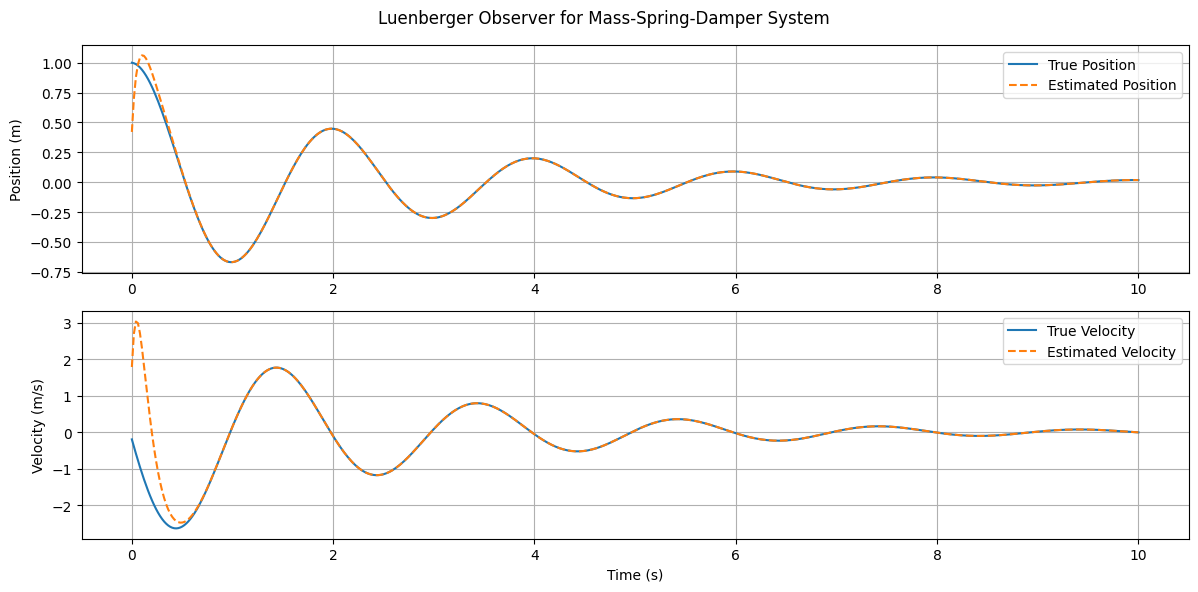

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control

# System parameters
m = 1.0   # mass (kg)
k = 10.0  # spring constant (N/m)
c = 1.0   # damping coefficient (N·s/m)

# State-space representation
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.array([[0],
              [1/m]])
C = np.array([[1, 0]])  # Only position is measured
D = np.array([[0]])

# Design Luenberger observer
observer_poles = [-10, -12]  # Place observer poles
L = control.place(A.T, C.T, observer_poles).T  # Compute observer gain matrix

# Time vector and initial condition
T = np.linspace(0, 10, 500)
dt = T[1] - T[0]

# Initial conditions
x = np.array([[1.0],   # true position (initial displacement)
              [0.0]])  # true velocity (at rest)
x_hat = np.array([[0.0],
                  [0.0]])  # initial observer estimate (guess)

x_hist = []
x_hat_hist = []

for t in T:
    # Output (measured position)
    y = C @ x

    # Observer update (no control input)
    x_hat_dot = A @ x_hat + L @ (y - C @ x_hat)  # No control input, B @ 0 removed
    x_hat += x_hat_dot * dt

    # System update with true state and no control input
    x_dot = A @ x + B @ np.array([[0]])  
    x += x_dot * dt

    # Store history for plotting
    x_hist.append(x.flatten())
    x_hat_hist.append(x_hat.flatten())

# Convert lists to numpy arrays for plotting
x_hist = np.array(x_hist)
x_hat_hist = np.array(x_hat_hist)

# Plotting results
plt.figure(figsize=(12, 6))

# Position plot
plt.subplot(2, 1, 1)
plt.plot(T, x_hist[:, 0], label="True Position")
plt.plot(T, x_hat_hist[:, 0], '--', label="Estimated Position")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)

# Velocity plot
plt.subplot(2, 1, 2)
plt.plot(T, x_hist[:, 1], label="True Velocity")
plt.plot(T, x_hat_hist[:, 1], '--', label="Estimated Velocity")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)

plt.suptitle("Luenberger Observer for Mass-Spring-Damper System")
plt.tight_layout()
plt.show()
